In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [2]:
data = pd.read_csv('data.csv')
data.columns = ['StandardOrder', 'ActualOrder', 'BallType', 'DropHeight', 'ReleaseAngle', 'Replication', 'BounceHeight']
data

,StandardOrder,ActualOrder,BallType,DropHeight,ReleaseAngle,Replication,BounceHeight
0,1,18,Golf,1.0,0.000000,1,33
1,2,24,Tennis,1.0,0.000000,1,61
2,3,1,Golf,1.5,0.000000,1,55
3,4,16,Tennis,1.5,0.000000,1,72
4,5,7,Golf,1.0,1.570796,1,31
5,6,17,Tennis,1.0,1.570796,1,64
6,7,13,Golf,1.5,1.570796,1,54
7,8,9,Tennis,1.5,1.570796,1,77
8,9,10,Golf,1.0,0.000000,2,36
9,10,8,Tennis,1.0,0.000000,2,59


In [3]:
design_table = data[['BallType', 'DropHeight', 'ReleaseAngle', 'BounceHeight']].copy()
design_table['BallType'] = design_table['BallType'].apply(lambda x: 1 if x == 'Tennis' else -1)
design_table['DropHeight'] = design_table['DropHeight'].apply(lambda x: 1 if x == 1.5 else -1)
design_table['ReleaseAngle'] = design_table['ReleaseAngle'].apply(lambda x: -1 if x == 0 else 1)
design_table

,BallType,DropHeight,ReleaseAngle,BounceHeight
0,-1,-1,-1,33
1,1,-1,-1,61
2,-1,1,-1,55
3,1,1,-1,72
4,-1,-1,1,31
5,1,-1,1,64
6,-1,1,1,54
7,1,1,1,77
8,-1,-1,-1,36
9,1,-1,-1,59


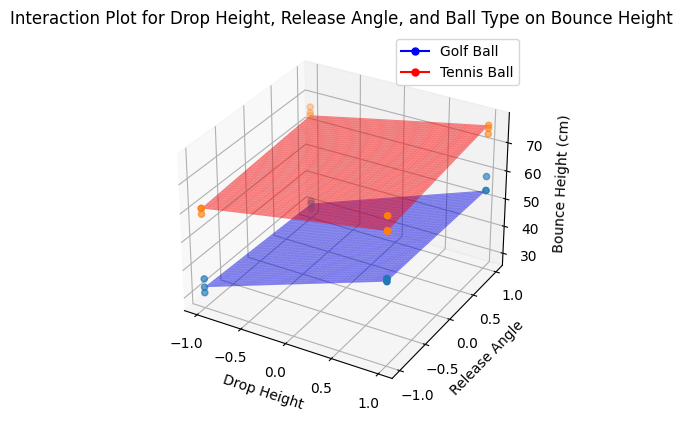

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.lines import Line2D

# Assuming design_table is your dataframe containing the data

# Create grid for interpolation
drop_height_grid = np.linspace(design_table['DropHeight'].min(), design_table['DropHeight'].max(), 100)
release_angle_grid = np.linspace(design_table['ReleaseAngle'].min(), design_table['ReleaseAngle'].max(), 100)
DropHeight_grid, ReleaseAngle_grid = np.meshgrid(drop_height_grid, release_angle_grid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Interaction Plot for Drop Height, Release Angle, and Ball Type on Bounce Height')
ax.set_xlabel('Drop Height')
ax.set_ylabel('Release Angle')
ax.set_zlabel('Bounce Height (cm)')

# Create custom legend handles for surfaces
surface_handles = []

# Plot surfaces for each ball type
for ball_type in design_table['BallType'].unique():
    subset = design_table[design_table['BallType'] == ball_type]
    
    # Interpolate to get surface
    points = subset[['DropHeight', 'ReleaseAngle']].values
    values = subset['BounceHeight'].values
    surface = griddata(points, values, (DropHeight_grid, ReleaseAngle_grid), method='cubic')

    # Plot surface
    if ball_type == 1:
        surface_handle = ax.plot_surface(DropHeight_grid, ReleaseAngle_grid, surface, color='r', alpha=0.5)
        surface_handles.append(('Tennis Ball', Line2D([0], [0], marker='o', color='r', markersize=5)))
    else:
        surface_handle = ax.plot_surface(DropHeight_grid, ReleaseAngle_grid, surface, color='b', alpha=0.5)
        surface_handles.append(('Golf Ball', Line2D([0], [0], marker='o', color='b', markersize=5)))

# Plot scatter points
scatter_handles = []
for ball_type in design_table['BallType'].unique():
    subset = design_table[design_table['BallType'] == ball_type]
    scatter_handle = ax.scatter(subset['DropHeight'], subset['ReleaseAngle'], subset['BounceHeight'], 
                                label='Tennis' if ball_type == 1 else 'Golf')
    scatter_handles.append(scatter_handle)

# Combine scatter and surface legend handles
handles =  [handle[1] for handle in surface_handles]
labels = ['Golf Ball', 'Tennis Ball']

# Add the legend
ax.legend(handles=handles, labels=labels)

plt.show()

In [ ]:
model = ols('BounceHeight ~ BallType * DropHeight * ReleaseAngle', data=design_table).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           BounceHeight   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     212.2
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.44e-14
Time:                        15:07:53   Log-Likelihood:                -45.699
No. Observations:                  24   AIC:                             107.4
Df Residuals:                      16   BIC:                             116.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
# Define a function to calculate PRESS statistic
def calculate_press(model, data):
    # Get the fitted values and leverage
    influence = model.get_influence()
    residuals = model.resid
    leverage = influence.hat_matrix_diag
    
    # Calculate the PRESS residuals
    press_residuals = residuals / (1 - leverage)
    
    # Calculate the PRESS statistic
    press = np.sum(press_residuals ** 2)
    return press

In [ ]:
# List of predictors
predictors = [
    'BounceHeight ~ BallType',
    'BounceHeight ~ DropHeight',
    'BounceHeight ~ ReleaseAngle',
    'BounceHeight ~ BallType + DropHeight',
    'BounceHeight ~ BallType + ReleaseAngle',
    'BounceHeight ~ DropHeight + ReleaseAngle',
    'BounceHeight ~ BallType * DropHeight',
    'BounceHeight ~ BallType * ReleaseAngle',
    'BounceHeight ~ DropHeight * ReleaseAngle',
    'BounceHeight ~ BallType + DropHeight + ReleaseAngle + BallType:DropHeight',
    'BounceHeight ~ BallType + DropHeight + ReleaseAngle + BallType:ReleaseAngle',
    'BounceHeight ~ BallType + DropHeight + ReleaseAngle + DropHeight:ReleaseAngle',
    'BounceHeight ~ BallType + DropHeight + ReleaseAngle + BallType:DropHeight + BallType:ReleaseAngle',
    'BounceHeight ~ BallType + DropHeight + ReleaseAngle + BallType:DropHeight + DropHeight:ReleaseAngle',
    'BounceHeight ~ BallType + DropHeight + ReleaseAngle + BallType:ReleaseAngle + DropHeight:ReleaseAngle',
    'BounceHeight ~ BallType + DropHeight + ReleaseAngle + BallType:DropHeight + BallType:ReleaseAngle + DropHeight:ReleaseAngle',
    'BounceHeight ~ BallType * DropHeight * ReleaseAngle'
    ]

# Generate all possible combinations of predictors (including interaction terms)
results = []
for predictor in predictors:
    # Fit the model
    model = ols(predictor, data=design_table).fit()
    
    # Calculate the PRESS statistic
    press = calculate_press(model, design_table)
    
    # Store the results
    results.append({'Predictors': predictor, 'PRESS': press})

# Convert results to a DataFrame
press_results = pd.DataFrame(results)

# Display the results sorted by PRESS statistic
press_results = press_results.sort_values(by='PRESS', ascending=True)
press_results

,Predictors,PRESS
12,BounceHeight ~ BallType + DropHeight + Release...,134.074074
16,BounceHeight ~ BallType * DropHeight * Release...,142.500000
15,BounceHeight ~ BallType + DropHeight + Release...,150.228374
6,BounceHeight ~ BallType * DropHeight,169.200000
9,BounceHeight ~ BallType + DropHeight + Release...,176.243767
13,BounceHeight ~ BallType + DropHeight + Release...,196.296296
3,BounceHeight ~ BallType + DropHeight,427.809524
10,BounceHeight ~ BallType + DropHeight + Release...,455.468144
14,BounceHeight ~ BallType + DropHeight + Release...,507.407407
11,BounceHeight ~ BallType + DropHeight + Release...,511.313019


In [ ]:
model = ols('BounceHeight ~ BallType + DropHeight + ReleaseAngle + BallType:DropHeight + BallType:ReleaseAngle', data=design_table).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           BounceHeight   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     280.1
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.07e-16
Time:                        15:07:54   Log-Likelihood:                -47.794
No. Observations:                  24   AIC:                             107.6
Df Residuals:                      18   BIC:                             114.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                56.29

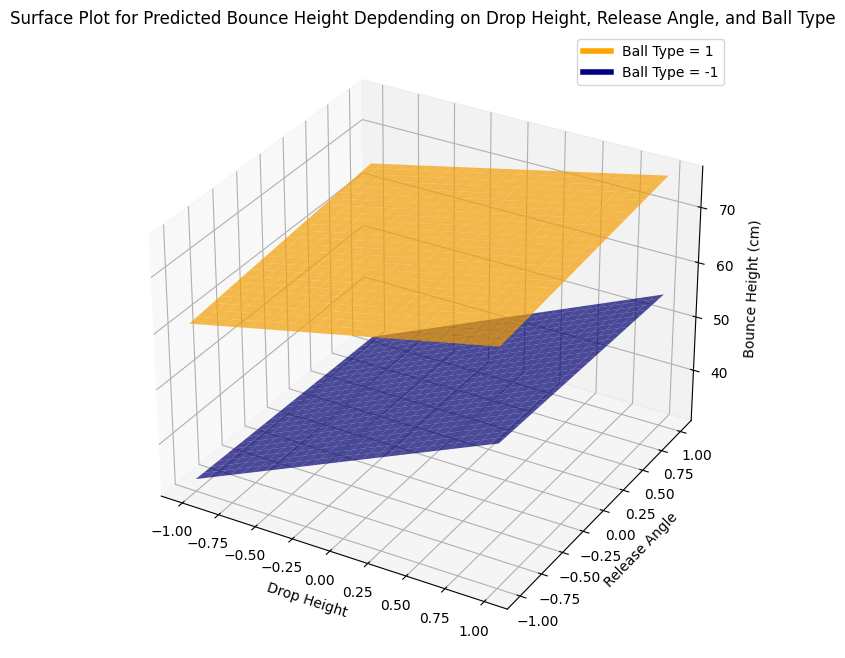

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Define the range of values for the predictors
drop_height = np.linspace(-1, 1, 100)
release_angle = np.linspace(-1, 1, 100)

# Generate a grid of values for the predictors
drop_height, release_angle = np.meshgrid(drop_height, release_angle)

# Calculate the predicted values for ball_type = -1
ball_type_1 = -1
predicted_1 = (
    model.params['Intercept'] +
    model.params['DropHeight'] * drop_height +
    model.params['ReleaseAngle'] * release_angle +
    (model.params['BallType'] * ball_type_1) +
    model.params['BallType:DropHeight'] * drop_height * ball_type_1 +
    model.params['BallType:ReleaseAngle'] * release_angle * ball_type_1
)

# Calculate the predicted values for ball_type = 1
ball_type_2 = 1
predicted_2 = (
    model.params['Intercept'] +
    model.params['DropHeight'] * drop_height +
    model.params['ReleaseAngle'] * release_angle +
    (model.params['BallType'] * ball_type_2) +
    model.params['BallType:DropHeight'] * drop_height * ball_type_2 +
    model.params['BallType:ReleaseAngle'] * release_angle * ball_type_2
)

# Create a figure for 3D plotting
fig = plt.figure(figsize=(10, 8))

# Create a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface for ball_type = -1 with grid lines and a specific color
surf1 = ax.plot_surface(drop_height, release_angle, predicted_1, color='navy', edgecolor='none', rstride=4, cstride=4, alpha=0.7)

# Plot the surface for ball_type = 1 with grid lines and a different color
surf2 = ax.plot_surface(drop_height, release_angle, predicted_2, color='orange', edgecolor='none', rstride=4, cstride=4, alpha=0.7)

# Set labels
ax.set_xlabel('Drop Height')
ax.set_ylabel('Release Angle')
ax.set_zlabel('Bounce Height (cm)')
ax.set_title('Surface Plot for Predicted Bounce Height Depdending on Drop Height, Release Angle, and Ball Type')

# Create dummy Line2D objects for legend
legend_ball_type_1 = Line2D([0], [0], color='orange', lw=4, label='Ball Type = 1')
legend_ball_type_2 = Line2D([0], [0], color='navy', lw=4, label='Ball Type = -1')

# Add the legend to the plot
ax.legend(handles=[legend_ball_type_1, legend_ball_type_2], loc='upper right')

# Display the plot
plt.show()

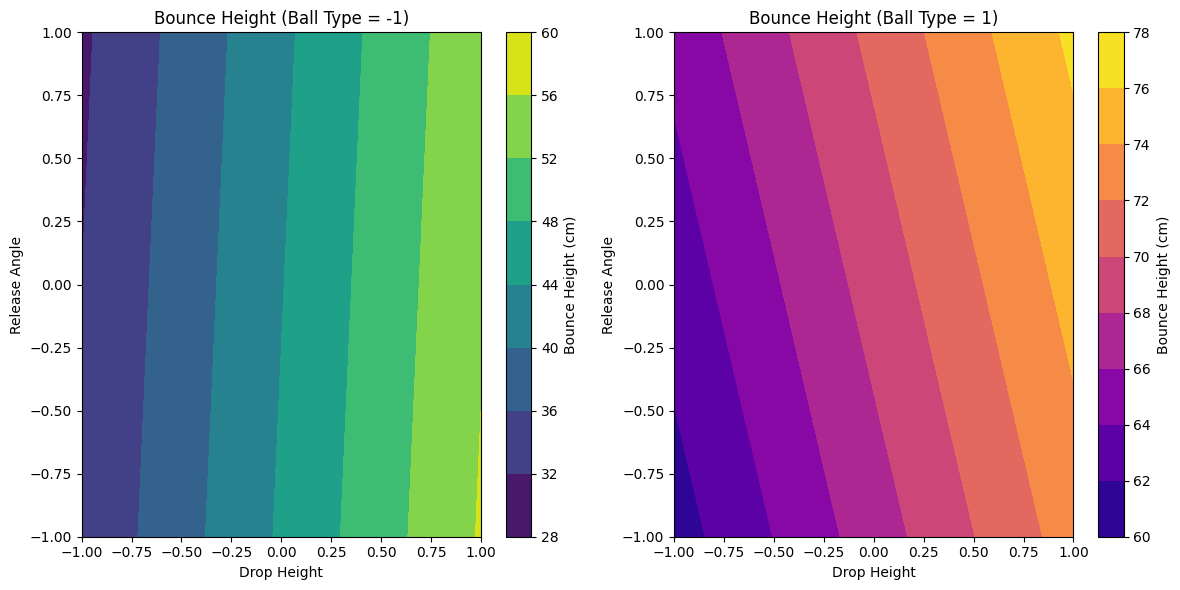

In [ ]:
# Define the range of values for the predictors
drop_height = np.linspace(-1, 1, 100)
release_angle = np.linspace(-1, 1, 100)

# Generate a grid of values for the predictors
drop_height, release_angle = np.meshgrid(drop_height, release_angle)

# Calculate the predicted values for ball_type = -1
ball_type_1 = -1
predicted_1 = (
    model.params['Intercept'] +
    model.params['DropHeight'] * drop_height +
    model.params['ReleaseAngle'] * release_angle +
    (model.params['BallType'] * ball_type_1) +
    model.params['BallType:DropHeight'] * drop_height * ball_type_1 +
    model.params['BallType:ReleaseAngle'] * release_angle * ball_type_1
)

# Calculate the predicted values for ball_type = 1
ball_type_2 = 1
predicted_2 = (
    model.params['Intercept'] +
    model.params['DropHeight'] * drop_height +
    model.params['ReleaseAngle'] * release_angle +
    (model.params['BallType'] * ball_type_2) +
    model.params['BallType:DropHeight'] * drop_height * ball_type_2 +
    model.params['BallType:ReleaseAngle'] * release_angle * ball_type_2
)

# Create a figure with two subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the contour for ball_type = -1 on the first subplot
cp1 = ax1.contourf(drop_height, release_angle, predicted_1, cmap='viridis')
ax1.set_xlabel('Drop Height')
ax1.set_ylabel('Release Angle')
ax1.set_title('Bounce Height (Ball Type = -1)')
fig.colorbar(cp1, ax=ax1, label='Bounce Height (cm)')

# Plot the contour for ball_type = 1 on the second subplot
cp2 = ax2.contourf(drop_height, release_angle, predicted_2, cmap='plasma')
ax2.set_xlabel('Drop Height')
ax2.set_ylabel('Release Angle')
ax2.set_title('Bounce Height (Ball Type = 1)')
fig.colorbar(cp2, ax=ax2, label='Bounce Height (cm)')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# predict center points
prediction = model.predict(pd.DataFrame({'BallType': [1], 'DropHeight': [0], 'ReleaseAngle': [0]}))
prediction

0    68.75
dtype: float64

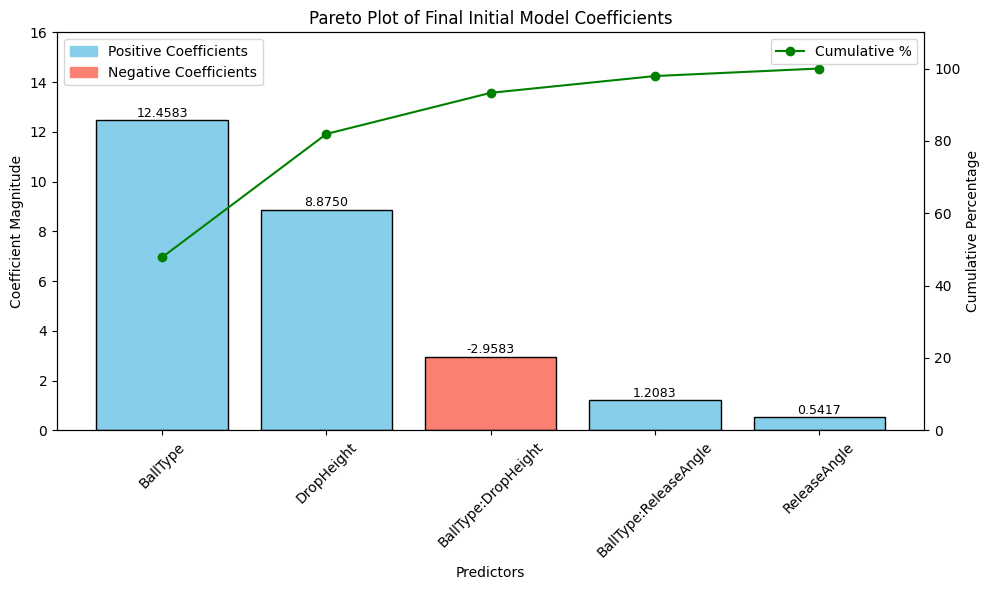

In [ ]:
# Get coefficients (excluding the intercept)
coefficients = model.params[1:]
abs_coefficients = coefficients.abs()

# Sort coefficients by magnitude
coefficients = coefficients.reindex(abs_coefficients.sort_values(ascending=False).index)

# Calculate cumulative percentage
cumulative = np.cumsum(coefficients.abs()) / coefficients.abs().sum() * 100

# Create a Pareto plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot of coefficients
colors = ['skyblue' if coef > 0 else 'salmon' for coef in coefficients]
bars = ax1.bar(coefficients.index, coefficients.abs(), color=colors, edgecolor='black')
ax1.set_ylabel('Coefficient Magnitude')
ax1.set_xlabel('Predictors')
ax1.set_title('Pareto Plot of Final Initial Model Coefficients')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 16)

# Add cumulative line using the right axis
ax2 = ax1.twinx()
ax2.plot(coefficients.index, cumulative, color='green', marker='o', label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage')
ax2.set_ylim(0, 110)
# ax2.axhline(80, color='gray', linestyle='--', linewidth=0.8, label='80% Threshold')

# Add data labels for the bars
for bar, coef in zip(bars, coefficients):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{coef:.4f}', ha='center', va='bottom', fontsize=9)

# Add custom legend for bar colors
legend_patches = [
    Patch(color='skyblue', label='Positive Coefficients'),
    Patch(color='salmon', label='Negative Coefficients')
]
ax1.legend(handles=legend_patches, loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

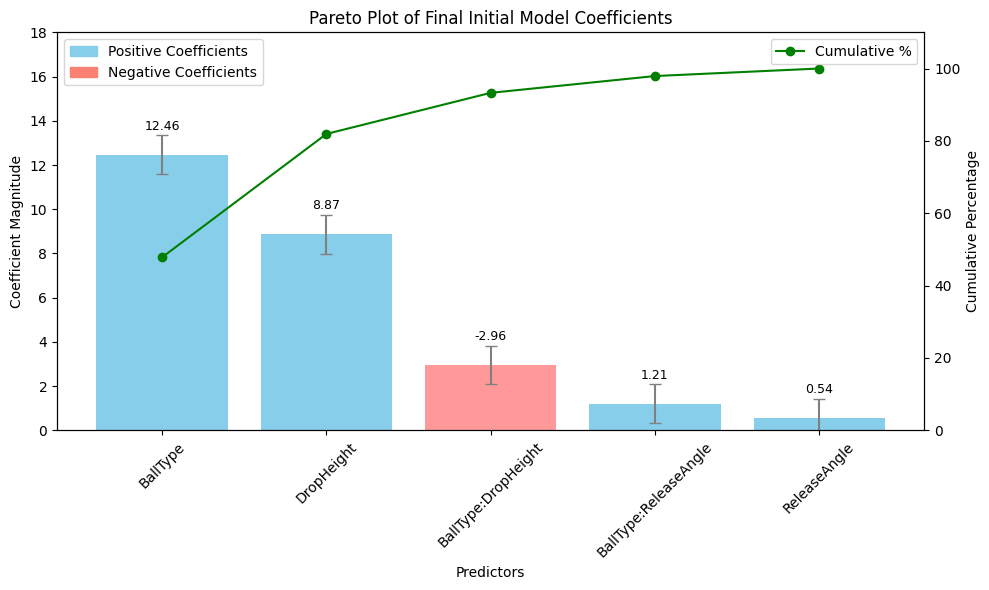

In [ ]:
# Get coefficients and confidence intervals (excluding the intercept)
coefficients = model.params[1:]
conf_int = model.conf_int()[1:]
abs_coefficients = coefficients.abs()

# Calculate error bars (half-width of the 95% CI)
error_bars = (conf_int[1] - conf_int[0]) / 2

# Sort coefficients and corresponding errors by magnitude
coefficients = coefficients.reindex(abs_coefficients.sort_values(ascending=False).index)
error_bars = error_bars.reindex(abs_coefficients.sort_values(ascending=False).index)

# Calculate cumulative percentage
cumulative = np.cumsum(coefficients.abs()) / coefficients.abs().sum() * 100

# Create a Pareto plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot of coefficients with error bars
colors = ['skyblue' if coef > 0 else '#FF9999' for coef in coefficients]
bars = ax1.bar(
    coefficients.index, 
    coefficients.abs(), 
    yerr=error_bars, 
    color=colors, 
    # edgecolor='black', 
    capsize=4,
    error_kw={'elinewidth': 1.5, 'ecolor': 'gray'}
)
ax1.set_ylabel('Coefficient Magnitude')
ax1.set_xlabel('Predictors')
ax1.set_title('Pareto Plot of Final Initial Model Coefficients')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 18)

# Add cumulative line using the right axis
ax2 = ax1.twinx()
ax2.plot(coefficients.index, cumulative, color='green', marker='o', label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage')
ax2.set_ylim(0, 110)

# Add data labels for the bars
for bar, coef in zip(bars, coefficients):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 1.0, f'{coef:.2f}', ha='center', va='bottom', fontsize=9)

# Add custom legend for bar colors
legend_patches = [
    Patch(color='skyblue', label='Positive Coefficients'),
    Patch(color='salmon', label='Negative Coefficients')
]
ax1.legend(handles=legend_patches, loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
